In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  image, label = example["image"], example["label"]
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test ) = mnist.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28*28))



print(X_train.shape)
print(y_train)

(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [3]:
numbers = [0,1,2,3,4,5,6,7,8,9]

In [4]:
from keras import models, layers
from tensorflow.keras.layers.experimental.preprocessing import *



# Input - 28 * 28 * 1 (Dimensions of input layer)   
# Hidden layers
# Output (10 digits)
# Softmax for multi-output classification

In [5]:

layer_1 = 128
layer_2 = 64
activation_function = 'relu'
optimizer = 'rmsprop'
no_of_epochs = 5

network = models.Sequential()

network.add(layers.Dense(layer_1, activation=activation_function, input_shape=(28 * 28,)))

network.add(layers.Dense(layer_2, activation=activation_function))

network.add(layers.Dense(10,activation='softmax'))

network.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [6]:
network.fit(X_train, y_train, epochs=no_of_epochs, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2610 - accuracy: 0.8861
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0459 - accuracy: 0.9473
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0316 - accuracy: 0.9611
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0256 - accuracy: 0.9692
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0213 - accuracy: 0.9731


In [7]:
predict = network.predict(X_test).argmax(1)


313/313 [==============================] - 1s 2ms/step


In [8]:
import numpy as np
ground_truth = np.argmax(y_test, axis = 1)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predict,ground_truth))
cf_matrix = confusion_matrix(ground_truth, predict)

[[ 966    0    2    0    1    4    8    2    3    1]
 [   0 1126    3    1    4    0    3    4    1    5]
 [   1    3  997    4    3    2    0   14    3    0]
 [   0    0   11  970    0    8    0   12    9    9]
 [   0    0    2    3  951    2    3    8    3   25]
 [   1    1    0   19    0  854    8    1    5    7]
 [   6    2    3    0   10    4  931    2    2    1]
 [   2    0    7    2    0    2    0  977    2    6]
 [   3    3    7   10    3   12    5    5  943    5]
 [   1    0    0    1   10    4    0    3    3  950]]


<AxesSubplot:>

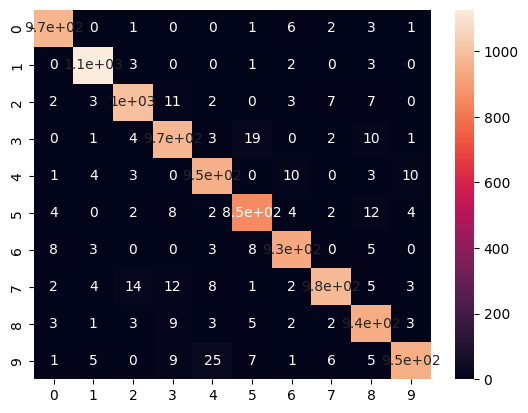

In [9]:
import seaborn as sns
sns.heatmap(cf_matrix, annot = True)

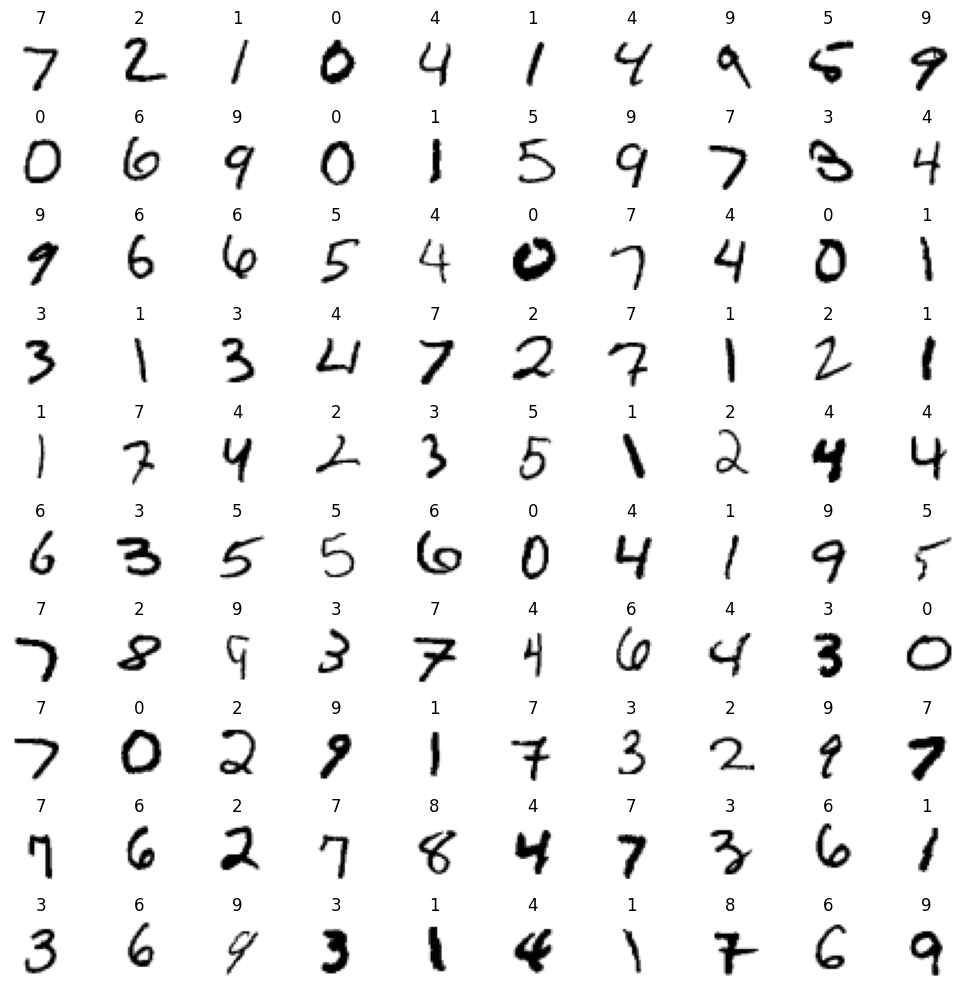

In [10]:
import matplotlib.pyplot as plt
reshaped = X_test.reshape(-1,28,28)
fig = plt.figure(figsize=(10,10))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.set_axis_off()
    plt.imshow(reshaped[i], cmap='binary')
    ax.set_title(predict[i])
plt.tight_layout()
plt.show()